In [1]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd
import plotly.express as px
#NOTE:
#the package samalg is not called samalg but is instead called sam-algorithm
#Python 3.10.11 Works Best

C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packag

# Read Mappings And Run SAMap

In [2]:
A=pd.read_csv('chicken_and_mouse\chms\maps\chms\ch_to_ms.txt',sep='\t',index_col=0,header=None)
B=pd.read_csv('chicken_and_mouse\chms\maps\chms\ms_to_ch.txt',sep='\t',index_col=0,header=None)
A.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
ND1,mt-Nd1,55.414,314,140,0,968,27,947,6,7.990000e-101,364.0
ND2,mt-Nd2,46.281,121,65,0,1,363,1,363,5.000000e-35,113.0
COX1,mt-Co1,69.355,434,133,0,1541,240,1538,237,0.000000e+00,664.0
COX2,mt-Co2,70.000,140,42,0,250,669,253,672,1.180000e-77,245.0
ATP6,mt-Atp6,63.889,108,39,0,355,678,352,675,9.430000e-27,104.0


In [3]:
B.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
Trav13-2,ENSGALG00010028649,44.000,25,14,0,67,141,385,459,9.950000e-07,29.4
Trdv5,ENSGALG00010025670,31.746,63,43,0,10,198,7,195,1.730000e-07,42.8
Trdv5,ENSGALG00010025476,34.694,49,32,0,52,198,52,198,3.230000e-07,41.8
Trgv7,ENSGALG00010017740,50.000,26,13,0,145,222,166,243,1.920000e-07,36.8
Trgv4,ENSGALG00010017740,34.722,72,47,0,196,411,145,360,2.350000e-09,59.3


In [4]:
#NOTE When loading in raw data, SAMap will automatically process them with SAM and save the results to an *_pr.h5ad file. For example, if the raw data is file.h5ad the processed data will be saved to file_pr.h5ad
fn1 = 'samap_adata_chicken_sub48.h5ad' #chicken
fn2 = 'samap_adata_sparse_mouse.h5ad' #mouse

In [5]:
#NOTE: SAMap expects the above to be in a dictionary keyed by the species IDs determined in the BLAST step:
filenames = {'ch':fn1,'ms':fn2}

In [6]:
#Load raw data mappings
sm = SAMAP(
        filenames,
        f_maps = 'chicken_and_mouse/chms/maps/',
        save_processed=False #if False, do not save the processed results to `*_pr.h5ad`
    )

Processing data ch from:
samap_adata_chicken_sub48.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Iteration: 1, Convergence: 0.7381763211849431


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Iteration: 2, Convergence: 0.08247286914016053


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Iteration: 3, Convergence: 0.01638294912152071


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Computing the UMAP embedding...


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Elapsed time: 127.30547499656677 seconds
Not updating the manifold...
Processing data ms from:
samap_adata_sparse_mouse.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Iteration: 1, Convergence: 0.7178241163680018


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Iteration: 2, Convergence: 0.046463473334401956


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._lil.lil_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Computing the UMAP embedding...


C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jacwe\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Elapsed time: 97.85917448997498 seconds
Not updating the manifold...
10850 `ch` gene symbols match between the datasets and the BLAST graph.
13753 `ms` gene symbols match between the datasets and the BLAST graph.


In [7]:
sm.run(pairwise=True)

Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 2.7570383548736572
Correcting data with means. 4.1029558181762695
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species ms...
Indegree coarsening
0/1 (0, 10561)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
          ch       ms
ch  0.000000  0.61685
ms  0.609393  0.00000
Calculating gene-gene correlations in the homology graph...
Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 2.509075403213501
Correcting data with means. 3.6955556869506836
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species ms...
Indegree coarsening
0/1 (0, 10561)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 2 complete.
Alignment scores:
          ch        ms
ch  0.000000  0.

In [8]:
samap = sm.samap
#combine species, after this analysis is done, time for visualization
#The expression data in samap.adata is a block-diagonal matrix of each species' gene expressions.

# Visualizations

<Axes: >

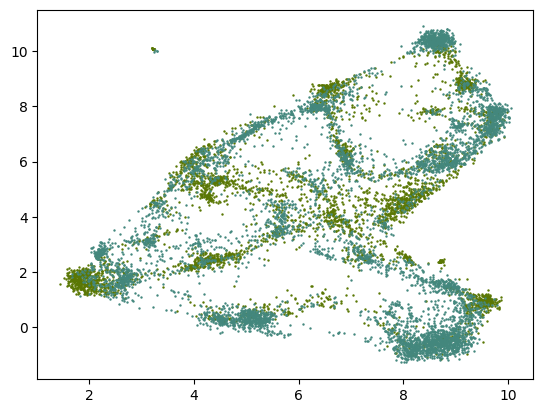

In [9]:
sm.scatter()

In [10]:
#interactive plot
sm.samap.gui()
#requires modules colorlover, plotly, ipyevent

    'data': [{'hoverinfo': 'text',
              'marker': {'size'…

In [11]:
#each species individually
sm.gui()

    'data': [{'hoverinfo': 'text',
              'marker': {'size'…

# Save Data for Seurat and SAMap Downstream Analysis

In [12]:
#NOTES and Investigation For Analyzing/Exporting Samap Data:
#The species ID for each cell is stored in samap.adata.obs['species']
#The combined graph is stored in samap.adata.obsp['connectivities']
#The refined homology graph is stored in samap.adata.varp['homology_graph_reweighted'] (or sm.gnnm_refined) and the gene names corresponding to this graph are stored in samap.adata.var_names (or sm.gns)
#Print adata structure
print(dir(samap.adata))

['T', 'X', '_BACKED_ATTRS', '_H5_ALIASES', '_H5_ALIASES_NAMES', '_X', '__annotations__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adata_ref', '_check_dimensions', '_check_uniqueness', '_clean_up_old_format', '_gen_repr', '_get_X', '_get_and_delete_multicol_field', '_get_obs_array', '_get_var_array', '_has_X', '_init_as_actual', '_init_as_view', '_inplace_subset_obs', '_inplace_subset_var', '_is_view', '_layers', '_mutated_copy', '_normalize_indices', '_obs', '_obsm', '_obsp', '_oidx', '_prep_dim_index', '_raw', '_remove_unused_categories', '_sanitize', '_set_backed', '_set_dim_df', '_set_dim_index', '_uns', '_var', 

In [ ]:
#save adata object as a pickle
import pickle
with open('samap_adata_sub48.pkl', 'wb') as file:
    pickle.dump(samap.adata, file)
#with open('samap_raw_adata_sub48.pkl', 'wb') as file:
#    pickle.dump(samap.adata_raw, file)

In [14]:
#Pickle the entire samap object
import samap.utils
samap.utils.save_samap(sm, 'samap_object_sub48')

In [15]:
#print entire object structure
print(dir(sm.samap))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'adata', 'adata_raw', 'calculate_mean_var', 'calculate_nnm', 'clustering', 'density_clustering', 'dispersion_ranking_NN', 'get_avg_obsm', 'get_cells', 'get_labels', 'get_labels_un', 'gui', 'hdbknn_clustering', 'identify_marker_genes_ratio', 'identify_marker_genes_rf', 'identify_marker_genes_sw', 'kmeans_clustering', 'leiden_clustering', 'load', 'load_data', 'load_obs_annotations', 'load_var_annotations', 'louvain_clustering', 'preprocess_args', 'preprocess_data', 'run', 'run_args', 'run_diff_map', 'run_diff_umap', 'run_tsne', 'run_umap', 'save', 'save_anndata', 'scatter', 'show_gene_expression']


In [16]:
#print each species new file structure
print(filenames) 

{'ch': <samalg.SAM object at 0x00000276AF2480A0>, 'ms': <samalg.SAM object at 0x00000276AB09B190>}


In [17]:
#save as h5ad for seurat
sm.samap.adata.write_h5ad(filename="samap_results_h5ad_sub48.h5ad", compression=None, compression_opts=None, as_dense=())